In [1]:
import numpy as np
import pandas as pd
#import time dependencies
from datetime import datetime
import time
from datetime import date, timedelta
import datetime
#import statistics dependencies
from scipy.stats import linregress
#import matplotlib dependencies
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.lines as mlines
# Import the API key.
from config import EIA_key
import eia
# Import the requests library.
import requests

In [2]:
API_Call=f"http://api.eia.gov/series/?api_key={EIA_key}&series_id=PET.WCESTUS1.W"
Series_Name= "U.S. Ending Stocks of Total Gasoline, Weekly"
Series_ID= "PET.WGTSTUS1.W"
#install EIA package--- pip install EIA_python
#pip install pyOpenSSL to get around SSL error
#these are the API keys I set up
api_key = EIA_key
api = eia.API(api_key)
#this is the start and end date for matplotlib
start_date = "2019-01-01"
end_date =  datetime.datetime.now()
# end_date= datetime.datetime.now()

In [3]:
#import data but still need to clean it
series_search = api.data_by_series(series=Series_ID)
df = pd.DataFrame(series_search)
# define a series and pass through api and Series_ID
def retrieve_time_series(api, Series_ID):
    """
    Return the time series dataframe, based on API and unique Series ID
    """
    #Retrieve Data By Series ID 
    series_search = api.data_by_series(series=Series_ID)
    ##Create a pandas dataframe from the retrieved time series
    global df
    df = pd.DataFrame(series_search)
    return df
# define another function main to run the script through
def main():
    """
    Run main script
    """
    #Create EIA API using your specific API key
    api_key = EIA_key
    api = eia.API(api_key)
#     #Declare desired series ID
#     Series_ID="PET.WGTSTUS1.W"
    df=retrieve_time_series(api, Series_ID)
    #Print the returned dataframe df
    print(df)
req = requests.get(API_Call, verify = False)

#Clean the dataframe by resetting the index because the date is automatically set as the index
df.reset_index(inplace=True)
df.rename(columns={'U.S. Ending Stocks of Total Gasoline, Weekly (Thousand Barrels)':'Gas'}, inplace=True)
df.rename(columns={'index':'Date'}, inplace=True)




#the days were repeated so we need to drop the last two days
test=df['Date']
length = len(test)          # for reading and writing sakes, len(A): lenght of A
newtest = [None] * length          # newtest = [none, none, none], go look up empty array creation
strLen = 0 

for i in range(0, length):             # for loop
    str = test[i]                      # get n th element of test
    strLen = len(str)                  # for reading sake, the lenght of string that will be spliced
    df['Date'][i] = str[0:strLen - 3] # n th element of newtest is the spliced n th element from test
    
    

#the rest of the dates was in a weird format so we have to get them into %Y%m%d format and then convert to datetime
def format_date(row_value):
    #split string on space and slice out the first two parts
    year=row_value.split(" ")[0]
    month=row_value.split(" ")[1][:2]
    day = row_value.split(" ")[1][2:]
    return f"{year}{month}{day}"
df['Date']=df['Date'].map(format_date)
df['Date']=pd.to_datetime(df['Date'].astype(int), format='%Y%m%d')

C:\Users\15124\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [4]:
gasoline_date_df=df[(df['Date']>start_date)& (df['Date']< end_date)]

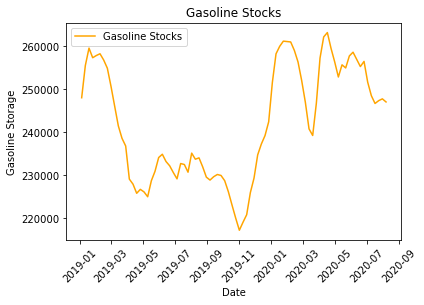

In [5]:
# plot just crude prices on one graph
fig, ax1=plt.subplots(frameon=False)

ax1.set_xlabel('Date')
ax1.set_ylabel('Gasoline Storage')
ax1.plot(gasoline_date_df['Date'],gasoline_date_df['Gas'], color='orange')
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
_=plt.xticks(rotation=45)
ax1.tick_params(axis='y')
ax1.set_title("Gasoline Stocks")

# defining legend style and data
blue_line = mlines.Line2D([], [], color='orange', label='Gasoline Stocks')
plt.legend(handles=[blue_line])
plt.savefig("GasolineAPI.png", bbox_inches='tight')